# Binary classification using perceptron

1. Load data
2. Explore data
3. Prepare data
4. Split data
5. Feature scaling
6. Choose model and (hyper) parameters
7. Train model
8. Evaluate model
9. Make predictions (unlabeled data)


## Load libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test, plot_decision_surface_predict

## Load data

In [90]:
# Load data from SKLearn
dataObj = datasets.load_iris()

In [91]:
dir(dataObj)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [92]:
print(dataObj.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [93]:
print(dataObj.feature_names)
print(dataObj.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [94]:
df = pd.DataFrame(dataObj.data, columns=dataObj.feature_names)
df['target'] = dataObj.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Explore data

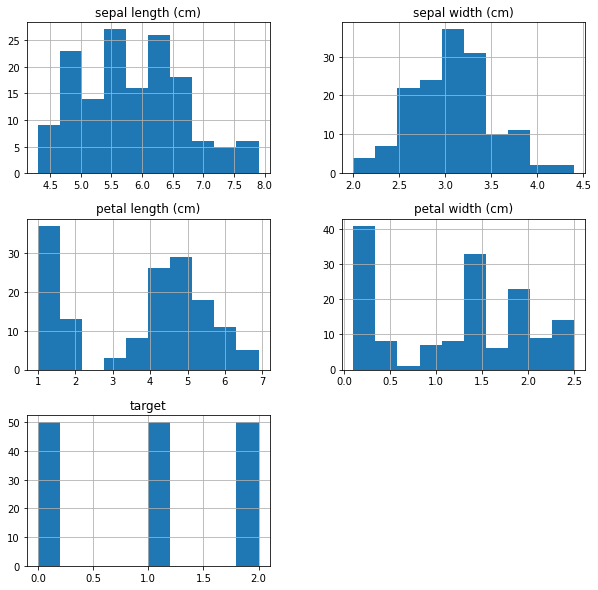

In [95]:
df.hist(figsize=(10,10))
display()

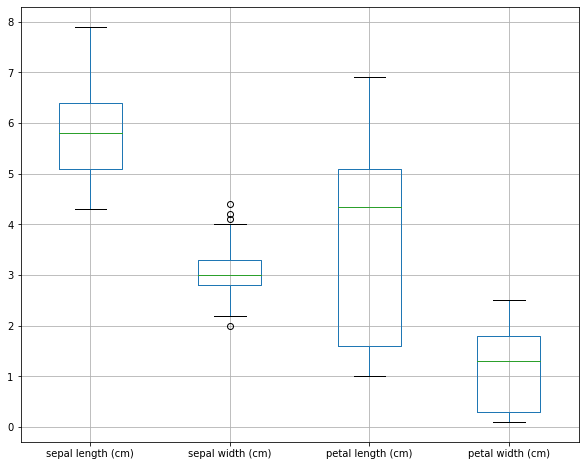

In [96]:
df.iloc[:,0:4].boxplot(figsize=(10,8))
display()

## Prepare data
- Choose only petal length and petal width as features
- Eliminate one class of flower

In [97]:
# Choose subsets of columns
df2 = df.iloc[:,[2,3,4]]

In [98]:
df2.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [99]:
df2['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [100]:
# Filering only certain classes
filt = (df2['target'] == 0) | (df2['target'] == 1) 
df3 = df2[filt].copy()
df3['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [101]:
#I want to see if I can change the target label.  It does not change the weight.
#df3['target'] = df3['target'].map({0:0, 1:1}).fillna(df3['target'])

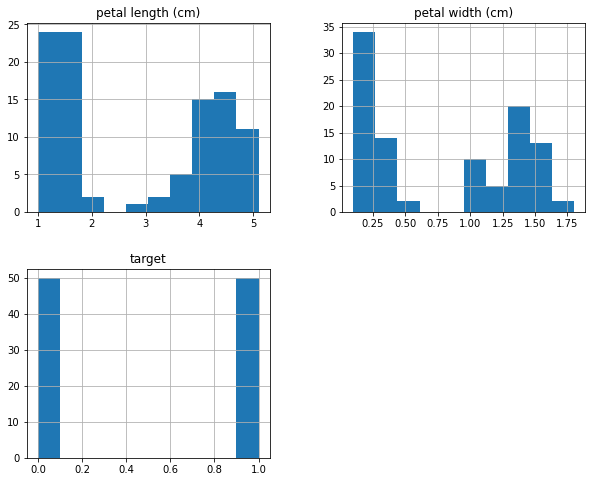

In [102]:
df3.hist(figsize=(10,8))
display()

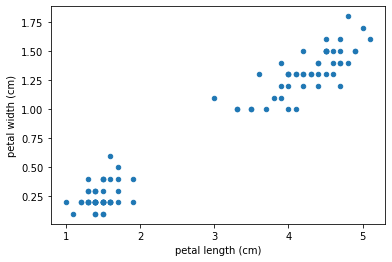

In [103]:
df3.plot.scatter(x='petal length (cm)', y='petal width (cm)')
display()

In [104]:
X = df3.iloc[:,[0,1]].values
y = df3.iloc[:,2].values

## Split data
- Train and test data
- Stratified splitting

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize data

In [106]:
sc = StandardScaler()

In [107]:
dir(sc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_validate_data',
 'copy',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'partial_fit',
 'set_params',
 'transform',
 'with_mean',
 'with_std']

In [108]:
sc.fit(X_train)

StandardScaler()

In [109]:
# Mean and Variance ([STD]^2)
print(sc.mean_)
print(sc.var_)

[2.86571429 0.78285714]
[2.10482449 0.31627755]


In [110]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [111]:
np.concatenate( (X_train, X_train_std), axis=1 ) 

array([[ 1.5       ,  0.2       , -0.94135169, -1.03640128],
       [ 4.5       ,  1.5       ,  1.12647106,  1.27518   ],
       [ 1.5       ,  0.3       , -0.94135169, -0.85858733],
       [ 1.4       ,  0.2       , -1.01027912, -1.03640128],
       [ 1.3       ,  0.2       , -1.07920654, -1.03640128],
       [ 1.1       ,  0.1       , -1.21706139, -1.21421522],
       [ 4.6       ,  1.3       ,  1.19539849,  0.91955211],
       [ 1.5       ,  0.2       , -0.94135169, -1.03640128],
       [ 4.8       ,  1.8       ,  1.33325334,  1.80862184],
       [ 1.5       ,  0.4       , -0.94135169, -0.68077339],
       [ 1.6       ,  0.2       , -0.87242427, -1.03640128],
       [ 1.2       ,  0.2       , -1.14813397, -1.03640128],
       [ 1.5       ,  0.2       , -0.94135169, -1.03640128],
       [ 4.6       ,  1.4       ,  1.19539849,  1.09736606],
       [ 4.5       ,  1.3       ,  1.12647106,  0.91955211],
       [ 4.7       ,  1.4       ,  1.26432591,  1.09736606],
       [ 4.        ,  1.

In [112]:
cols = ['X_1', 'X_2', 'X_std_1', 'X_std_2']
temp = pd.DataFrame( np.concatenate( (X_train, X_train_std), axis=1 ), columns=cols )
temp.head()

,X_1,X_2,X_std_1,X_std_2
0,1.5,0.2,-0.941352,-1.036401
1,4.5,1.5,1.126471,1.275180
2,1.5,0.3,-0.941352,-0.858587
3,1.4,0.2,-1.010279,-1.036401
4,1.3,0.2,-1.079207,-1.036401


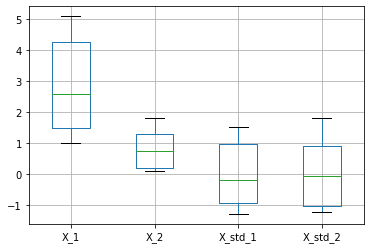

In [113]:
temp.boxplot()
display()

## Choose model and (hyper) parameters

In [114]:
param = "firstTry"
paramSet = {
    "firstTry": {"eta0": 0.01, "n_iter_no_change": 3, "random_state": 5},
    "best": {"eta0": 0.1, "n_iter_no_change": 10, "random_state": 1},
}

eta0 = paramSet[param]["eta0"]
random_state=paramSet[param]["random_state"]
n_iter_no_change=paramSet[param]["n_iter_no_change"]

In [115]:
ppn = Perceptron(
    eta0=eta0,
    random_state=random_state,
    verbose=1,
    n_iter_no_change=n_iter_no_change,
    )

## Train model

In [116]:
# Training
ppn.fit(X_train_std, y_train)

-- Epoch 1
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 70, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 140, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 210, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 2, Bias: 0.000000, T: 280, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 4 epochs took 0.00 seconds


Perceptron(eta0=0.01, n_iter_no_change=3, random_state=5, verbose=1)

In [117]:
# Model weights and bias
W = ppn.coef_
w0 = ppn.intercept_
print(f'Weights are {W}.')
print(f'Bias is {w0}.')

Weights are [[0.01585331 0.01244698]].
Bias is [0.].


## Evaluate model

In [118]:
# Prediction from test data
y_pred = ppn.predict(X_test_std)

In [119]:
y_pred

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

### Manual

In [120]:
Z = X_test_std.dot(W.reshape(2,)) + w0
print(Z)

[ 0.03370264  0.00848653 -0.03112957 -0.03003685 -0.03112957  0.01720056
  0.03479536  0.03042445 -0.02891633 -0.02673087  0.03812913  0.02602575
  0.02711848 -0.02670308  0.0238403   0.03482316 -0.02121165  0.03373043
 -0.02891633 -0.02558256 -0.02339711 -0.0278236  -0.02673087  0.03042445
  0.00955147 -0.02891633 -0.02891633  0.0238403   0.03373043 -0.01787789]


In [121]:
phi = Z
np.where(phi > 0, 1, 0)

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0])

In [122]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [123]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [124]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 0
Accuracy score: 1.0


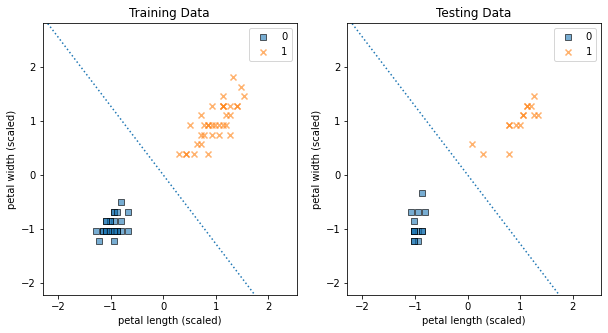

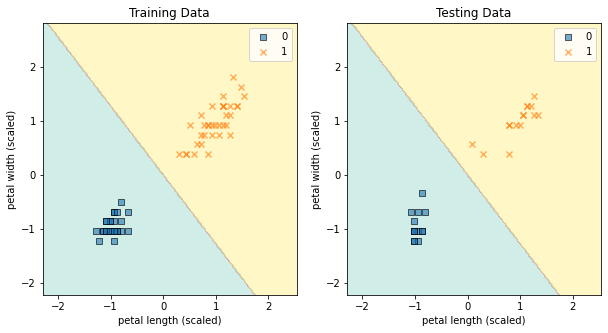

In [125]:
plot_decision_surface_train_test(X_train_std, X_test_std, y_train, y_test, ppn, filename="T11_Img_Perceptron.png")

## Make prediction
- Unlabeled data

In [126]:
X1_min = X[:,0].min()
X1_max = X[:,0].max()
X2_min = X[:,1].min()
X2_max = X[:,1].max()

In [127]:
X1_new = np.random.uniform(low=X1_min, high=X1_max, size=(50,1))
X2_new = np.random.uniform(low=X2_min, high=X2_max, size=(50,1))
X_new = np.concatenate( (X1_new, X2_new) , axis=1)
temp = pd.DataFrame(X_new, columns=['X1','X2'])
temp.head()

,X1,X2
0,2.219831,0.263959
1,1.768858,0.904890
2,1.295552,0.607082
3,4.908513,0.338930
4,2.593672,0.691940


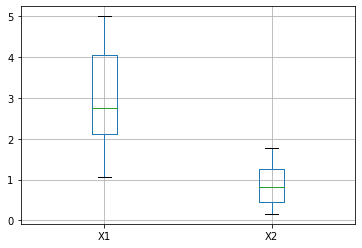

In [128]:
temp.boxplot()
display()

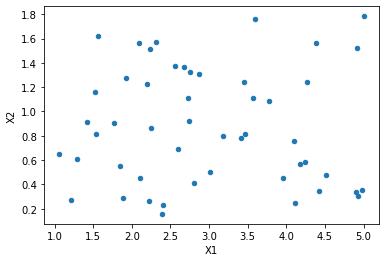

In [129]:
temp.plot.scatter(x='X1',y='X2')
display()

In [130]:
X_new_std =  sc.transform(X_new)

In [131]:
y_new =  ppn.predict(X_new_std)
print(y_new)

[0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 0 0]


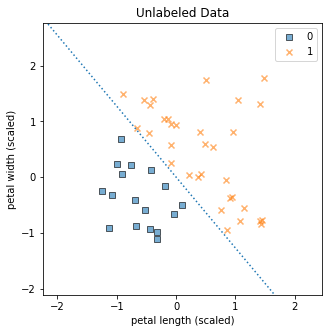

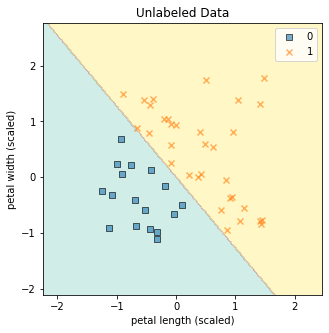

In [132]:
plot_decision_surface_predict(X_new_std, y_new, ppn, filename="T11_Img_Perceptron_new.png")